In [17]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print(os.listdir())

['.DS_Store', 'Data Extraction.ipynb', 'incidents_part1_part2.csv', '.ipynb_checkpoints']


In [3]:
df_philly_crime = pd.read_csv('incidents_part1_part2.csv')

/Users/yasue/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Drop useless features

In [4]:
for col in df_philly_crime:
    if df_philly_crime[col].dtype == 'object' and col != 'dispatch_date_time' and col != 'text_general_code':
        df_philly_crime = df_philly_crime.drop([col], axis = 1)
       
# none-object types to drop
df_philly_crime = df_philly_crime.drop(['objectid','dc_dist','dc_key','ucr_general','point_x','point_y'], axis = 1);

# Limit to Temple Area only (limit Latitude and Longitude)

In [5]:
df_tu_crime = df_philly_crime.loc[((df_philly_crime['lat'] >= 39.970748) & (df_philly_crime['lat'] <= 39.991041)) & (df_philly_crime['lng'] >= -75.170027) & (df_philly_crime['lng'] <= -75.144994)]
df_tu_crime.shape

(94216, 5)

# Make a column to display year

<h3>Convert 'dispatch_date_time' to type datetime64</h3>

In [6]:
df_tu_crime['dispatch_date_time'] = pd.to_datetime(df_tu_crime['dispatch_date_time'])

/Users/yasue/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


<h3>Extract year and append it to main df</h3>

In [7]:
df_tu_crime['year'] = df_tu_crime['dispatch_date_time'].dt.year

/Users/yasue/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


# Filter by year

In [8]:
df_tu_crime_2018 = df_tu_crime.loc[(df_tu_crime['year'] == 2018) | (df_tu_crime['year'] == 2019) ]

# Count total crime types

In [9]:
print(df_tu_crime_2018.shape)
def crime_count_print(df):
    crime_count = {}
    df_crime_list = df['text_general_code']
    for crime in df_crime_list:
        if crime not in crime_count:
            crime_count[crime] = 1
        else:
            crime_count[crime] += 1
    for key, value in crime_count.items():
        print(key,value)
crime_count_print(df_tu_crime_2018)

(7047, 6)
Burglary Residential 347
Burglary Non-Residential 42
Other Assaults 1040
Thefts 1057
Theft from Vehicle 756
Narcotic / Drug Law Violations 236
Motor Vehicle Theft 88
Homicide - Criminal 15
Vandalism/Criminal Mischief 724
Robbery Firearm 143
All Other Offenses 647
Arson 17
Fraud 804
Recovered Stolen Motor Vehicle 292
Weapon Violations 89
Other Sex Offenses (Not Commercialized) 40
DRIVING UNDER THE INFLUENCE 125
Rape 44
Robbery No Firearm 173
Aggravated Assault No Firearm 230
Embezzlement 5
Aggravated Assault Firearm 98
Forgery and Counterfeiting 1
Receiving Stolen Property 1
Disorderly Conduct 20
Public Drunkenness 3
Homicide - Criminal  1
nan 1
Liquor Law Violations 6
Offenses Against Family and Children 1
Gambling Violations 1


# Map time!

In [10]:
import folium
from folium import plugins
from folium.plugins import HeatMap

map_TU = folium.Map(location=[39.980891, -75.157219],
                    zoom_start = 14.5) 

def show_map(df):
    map_TU = folium.Map(location=[39.980891, -75.157219],
                        zoom_start = 14.5) 
    crime_marks_df = df[['lat', 'lng']]
    crime_data = [[row['lat'], row['lng']] for index, row in crime_marks_df.iterrows()]
#     HeatMap(heat_data, radius = 10).add_to(map_TU)
    plugins.FastMarkerCluster(crime_data).add_to(map_TU)
    return map_TU

show_map(df_tu_crime_2018)

# Filter by crime...


In [65]:
flt_crime_dict = {}
flt_crime_list =['Thefts','Aggravated Assault Firearm','Other Assaults','Theft from Vehicle',
              'Other Sex Offenses (Not Commercialized)','Rape','Burglary Residential',
              'Robbery No Firearm','Aggravated Assault No Firearm',
              'Robbery Firearm','Motor Vehicle Theft','Homicide - Criminal'
             ]

def crime_fltr(df, flt_crime_list):
    return df[df['text_general_code'].isin(flt_crime_list)]
df_flt_tu_crime_2018 = crime_fltr(df_tu_crime_2018,flt_crime_list)

 <h2>Map again</h2>


In [66]:
df_flt_tu_crime_2018.shape # reduction from 7000 crimes to 4000 after filtering

(4031, 6)

In [67]:
show_map(df_flt_tu_crime_2018)

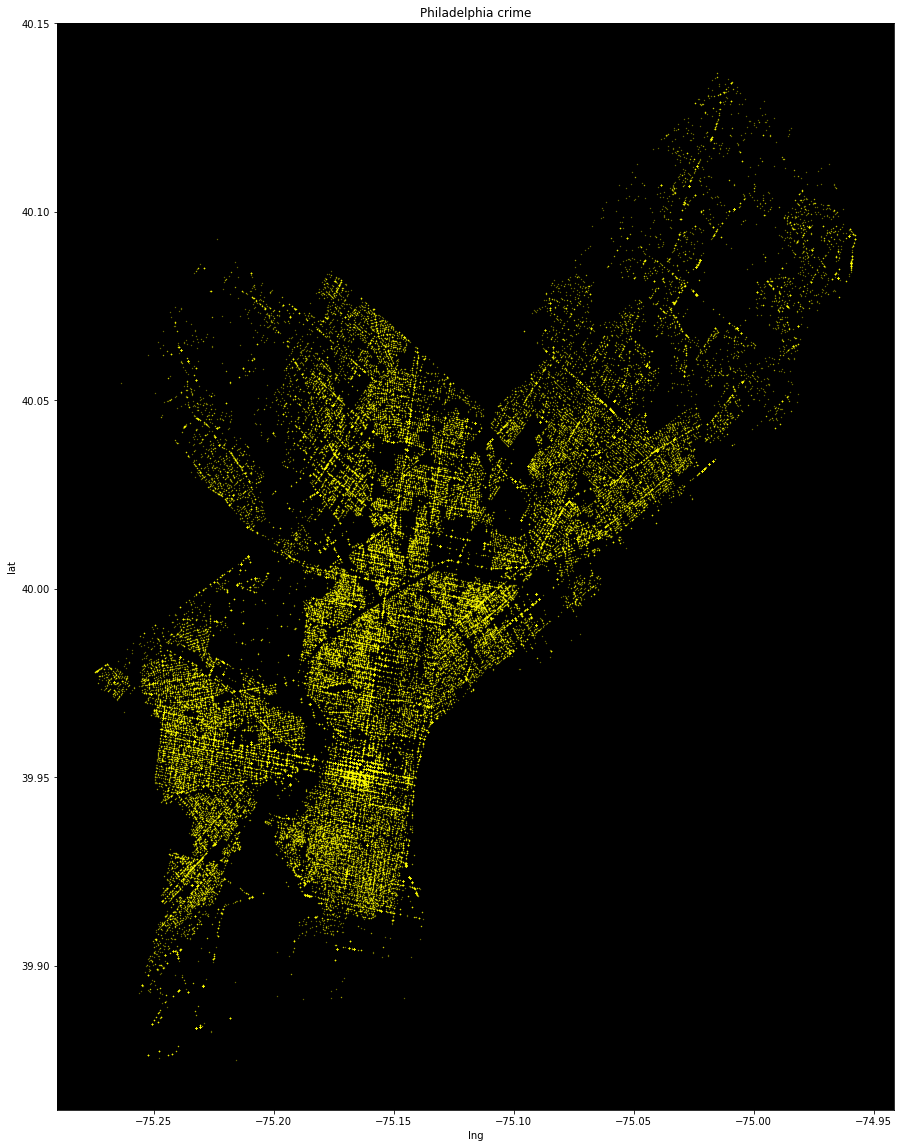

In [77]:
# quickly filter crime and time in Philly to match the filtered crime for Temple

df_philly_crime['dispatch_date_time'] = pd.to_datetime(df_philly_crime['dispatch_date_time'])
df_philly_crime['year'] = df_philly_crime['dispatch_date_time'].dt.year
flt_df_philly_crime = df_philly_crime.loc[(df_philly_crime['year'] == 2018) | (df_philly_crime['year'] == 2019)]
flt_df_philly_crime = crime_fltr(flt_df_philly_crime, flt_crime_list)


f, (ax1) = plt.subplots(1,sharey=True,figsize=(15,20))

flt_df_philly_crime.plot(kind='scatter', x='lng', y='lat',
                color='yellow', 
                s=.09, alpha=.6, subplots=True, ax=ax1)
ax1.set_title("Philadelphia crime")
ax1.set_facecolor('black')



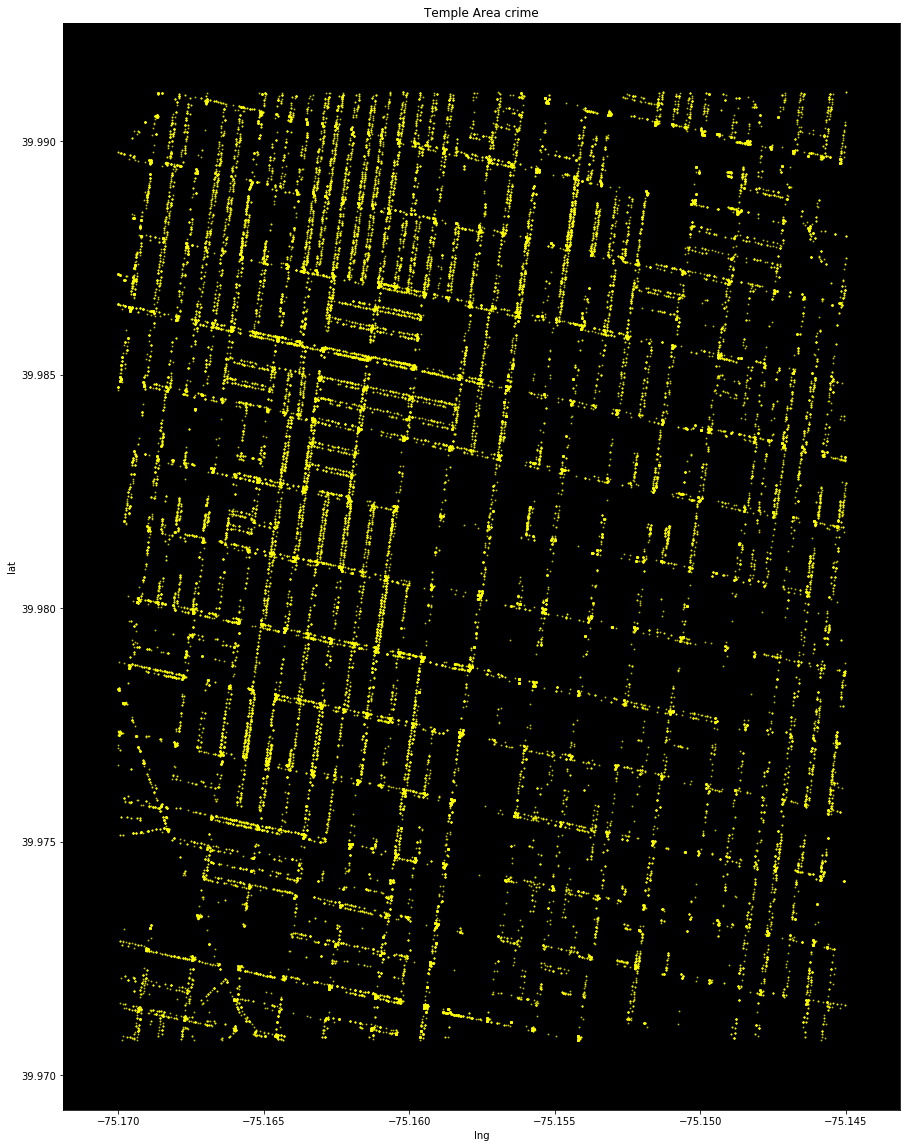

In [78]:
f, (ax1) = plt.subplots(1, sharey=True,figsize=(15,20))
df_tu_crime.plot(kind='scatter', x='lng', y='lat',
                color='yellow', 
                s=.9, alpha=.6, subplots=True, ax=ax1)
ax1.set_title("Temple Area crime")
ax1.set_facecolor('black')